<a href="https://colab.research.google.com/github/sankardevisharath/amex-default-prediction/blob/master/notebooks/explore_columns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Explore Dataset Column Wise

## Load Data From Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%mkdir data
%cd data
%mkdir raw
%cd raw

/content/data
/content/data/raw


In [3]:
!cp /content/drive/MyDrive/amex-default-prediction/data/raw/amex-default-prediction.zip .

In [4]:
!unzip amex-default-prediction.zip train_data.csv

Archive:  amex-default-prediction.zip
  inflating: train_data.csv          


In [5]:
!unzip amex-default-prediction.zip train_labels.csv

Archive:  amex-default-prediction.zip
  inflating: train_labels.csv        


## Setup Environment

In [6]:
import gc

import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
TRAIN_DATA_PATH = '/content/data/raw/train_data.csv'
TRAIN_LABELS_PATH = '/content/data/raw/train_labels.csv'

In [8]:
def read_cols(cols):
  df = pd.read_csv(TRAIN_DATA_PATH, usecols=cols)
  df = append_label(df)
  return df

## Explore Column Metadata

Load train labels dataframe

In [9]:
train_labels = pd.read_csv(TRAIN_LABELS_PATH)

In [10]:
train_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458913 entries, 0 to 458912
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   customer_ID  458913 non-null  object
 1   target       458913 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 7.0+ MB


There are two columns in the train_labels file, customer_ID of the customer & target variable. Target variable is of type int64.

Below utility function can be used to merge target column to another dataframe.

In [11]:
def append_label(source_df):
  return pd.merge(left=source_df, right=train_labels, how='inner')

Read 10 rows from the training data to check the object types and column names.

In [12]:
pd.read_csv(TRAIN_DATA_PATH, nrows=10).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Columns: 190 entries, customer_ID to D_145
dtypes: float64(185), int64(1), object(4)
memory usage: 15.0+ KB


There are 185 float64, 4 Object, 1 int64 columns. Now let us take all the columns and corresponding dtype into a variable.

In [13]:
columns = pd.read_csv(TRAIN_DATA_PATH, nrows=10).dtypes

In [ ]:
columns[columns==object]

customer_ID    object
S_2            object
D_63           object
D_64           object
dtype: object

There customer_ID, S_2, D_63, D_64 are the columns with datatype object. Lets check each column. 

## Customer ID, Statment Date & Label 

### Customer ID

In [ ]:
cust_id_stmt_date_df = pd.read_csv(TRAIN_DATA_PATH, usecols=['customer_ID', 'S_2'])

In [ ]:
cust_id_stmt_date_df.shape

(Delayed('int-7c598bdb-9c0f-43ab-8013-e869d979bfa7'), 2)

In [ ]:
cust_id_stmt_date_df = append_label(cust_id_stmt_date_df)

In [ ]:
cust_id_stmt_date_df.shape

(5531451, 3)

In [ ]:
cust_id_stmt_date_df.head(5)

,customer_ID,S_2,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,0
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-06-13,0
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-07-16,0


In [ ]:
cust_id_stmt_date_df['customer_ID'].nunique()

458913

There are around half million unique customers in the train data set

In [ ]:
cust_id_stmt_date_df.isna().sum()

customer_ID    0
S_2            0
target         0
dtype: int64

None of the columns are NAN in these 3 columns.

In [ ]:
cust_id_len = cust_id_stmt_date_df.customer_ID.str.len().max()
print(f'Maximum size of value in customer_id column is {cust_id_len}')
print(f'Total size of column customer_id is {round(cust_id_len * cust_id_stmt_date_df.shape[0]/(1024 * 1024), 2)} MB')

Maximum size of value in customer_id column is 64
Total size of column customer_id is 337.61 MB


In [ ]:
s_2_len = cust_id_stmt_date_df.S_2.str.len().max()
print(f'Maximum size of value in customer_id column is {s_2_len}')
print(f'Total size of column S_2 is {round(s_2_len * cust_id_stmt_date_df.shape[0]/(1024 * 1024), 2)} MB')

Maximum size of value in customer_id column is 10
Total size of column S_2 is 52.75 MB


In [ ]:
print(f'Total size of column target is {round(8 * cust_id_stmt_date_df.shape[0]/(1024 * 1024), 2)} MB')

Total size of column target is 42.2 MB


In [ ]:
cust_id_stmt_date_df["S_2"] = pd.to_datetime(cust_id_stmt_date_df["S_2"])

### Distribution of target variable

In [ ]:
target_dist = cust_id_stmt_date_df.target.value_counts()
target_dist = target_dist.transform(lambda x: (x/x.sum()).mul(100))

Text(0, 0.5, 'Percentage (%)')

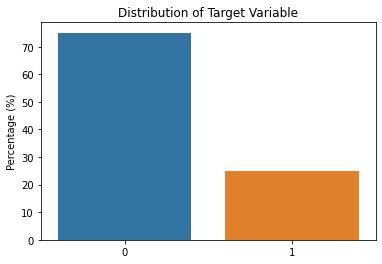

In [ ]:
ax = sns.barplot(x=target_dist.index, y=target_dist.values)
plt.title('Distribution of Target Variable')
plt.ylabel('Percentage (%)')

The dataset has 25% positive ( defaults on payment) & 75% negative cases. We might have to consider this imbalance while building the model.
### Statment Date Analysis

In [ ]:
print(f'Minimum date is {cust_id_stmt_date_df.S_2.min()}')
print(f'Maxim date is {cust_id_stmt_date_df.S_2.max()}')

Minimum date is 2017-03-01 00:00:00
Maxim date is 2018-03-31 00:00:00


The data contains entries for 13 months. We have data in March from year 2017 & 2018. 

In [ ]:
stmt_dt_dist = pd.Series(cust_id_stmt_date_df.S_2.dt.to_period('M')).value_counts(sort=True)
stmt_dt_dist

2018-03    458913
2018-02    452781
2018-01    446255
2017-12    438910
2017-11    434268
2017-10    430292
2017-09    425455
2017-08    421099
2017-07    415602
2017-06    410384
2017-04    401556
2017-05    400306
2017-03    395630
Freq: M, Name: S_2, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text major ticklabel objects>)

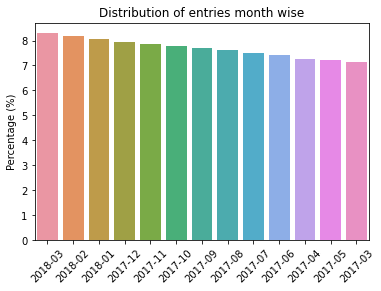

In [ ]:
stmt_dt_dist = stmt_dt_dist.transform(lambda x: (x/x.sum()).mul(100))
ax = sns.barplot(x=stmt_dt_dist.index, y=stmt_dt_dist.values)
plt.title('Distribution of entries month wise')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)

Each month contains around 7% to 8% of the complete dataset.

In [ ]:
del stmt_dt_dist
stmt_dt_dist = cust_id_stmt_date_df.copy()
stmt_dt_dist.head()

,customer_ID,S_2,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,0
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-06-13,0
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-07-16,0


In [ ]:
stmt_dt_dist['S_2'] = cust_id_stmt_date_df.S_2.dt.to_period('M')
stmt_dt_dist.head()

,customer_ID,S_2,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03,0
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04,0
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05,0
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-06,0
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-07,0


In [ ]:
month_target_grp = stmt_dt_dist.groupby(['S_2', 'target']).count()
month_target_grp = month_target_grp.reset_index()
month_target_grp.head()

,S_2,target,customer_ID
0,2017-03,0,303837
1,2017-03,1,91793
2,2017-04,0,306650
3,2017-04,1,94906
4,2017-05,0,304710
5,2017-05,1,95596
6,2017-06,0,310850
7,2017-06,1,99534
8,2017-07,0,313413
9,2017-07,1,102189


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text major ticklabel objects>)

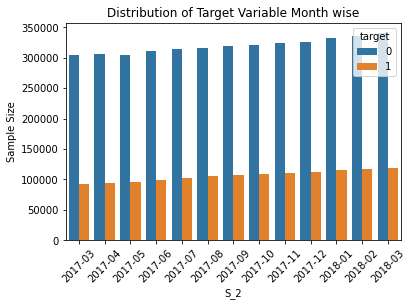

In [ ]:
sns.barplot(x=month_target_grp.S_2,y=month_target_grp.customer_ID,
                 hue=month_target_grp.target, data=month_target_grp)
plt.title('Distribution of Target Variable Month wise')
plt.ylabel('Sample Size')
plt.xticks(rotation=45)

Each month contains approximately 300,000 customers who are non defaulting and 90,000 customers who defaults on loan. This is approximately in the ratio 3:1 ratio. Also we can see that the number of customers are increasing slightly every month.

In [ ]:
del month_target_grp, stmt_dt_dist

In [ ]:
stmt_dt_dist = cust_id_stmt_date_df.copy()
stmt_dt_dist['S_2'] = cust_id_stmt_date_df.S_2.dt.dayofweek
stmt_dt_dist.head()


,customer_ID,S_2,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,3,0
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,4,0
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,6,0
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,1,0
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,6,0


In [ ]:
month_target_grp = stmt_dt_dist.groupby(['S_2', 'target']).count()
month_target_grp = month_target_grp.reset_index()
month_target_grp

,S_2,target,customer_ID
0,0,0,593291
1,0,1,194271
2,1,0,592403
3,1,1,198204
4,2,0,596923
5,2,1,198874
6,3,0,595929
7,3,1,199132
8,4,0,614962
9,4,1,202729


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

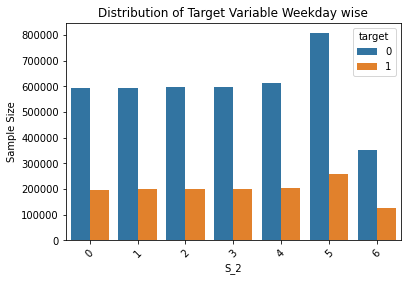

In [ ]:
sns.barplot(x=month_target_grp.S_2,y=month_target_grp.customer_ID,
                 hue=month_target_grp.target, data=month_target_grp)
plt.title('Distribution of Target Variable Weekday wise')
plt.ylabel('Sample Size')
plt.xticks(rotation=45)

Highest number of statements are sent on Saturday and Sunday only very few statements are sent.

In [ ]:
  columns[columns==np.int64]

## D_63 & D_64 

From the description of the problem, these two columns are categorical.

In [ ]:
d_63_64_df = pd.read_csv(TRAIN_DATA_PATH, usecols=['customer_ID','D_63', 'D_64', 'S_2'])

In [ ]:
d_63_64_df = append_label(d_63_64_df)

In [ ]:
d_63_64_df.shape

(5531451, 5)

In [ ]:
d_63_64_df['D_63'].nunique()

6

In [ ]:
d_63_64_df['D_63'].unique()

array(['CR', 'CO', 'CL', 'XZ', 'XM', 'XL'], dtype=object)

In [ ]:
d_63_64_df['D_63'].isnull().sum()

0

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

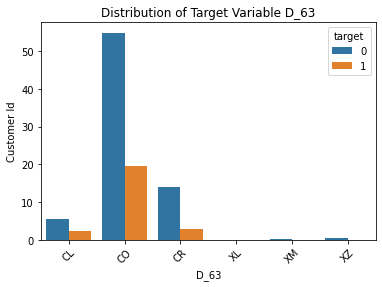

In [ ]:
grp = d_63_64_df.groupby(by=['D_63', 'target']).count()
grp = grp.reset_index()
grp['Percentage'] = 100 * grp['customer_ID'] / grp['customer_ID'].sum()
sns.barplot(x=grp.D_63,y=grp.Percentage,
                 hue=grp.target, data=grp)
plt.title('Distribution of Target Variable D_63')
plt.ylabel('Customer Id')
plt.xticks(rotation=45)

Most of the variables are of category 'CO'.

In [ ]:
d_63_64_df['D_64'].nunique()

4

In [ ]:
d_63_64_df['D_64'].unique()

array(['O', 'R', nan, 'U', '-1'], dtype=object)

In [ ]:
d_63_64_df['D_64'].isnull().sum()

217442

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

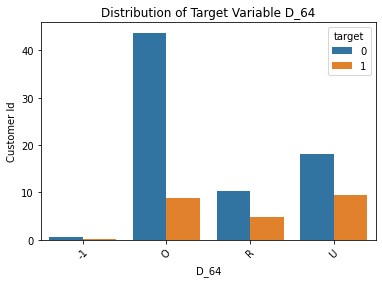

In [ ]:
del grp 
grp = d_63_64_df.groupby(by=['D_64', 'target'], dropna=False).count()
grp = grp.reset_index()
grp['Percentage'] = 100 * grp['customer_ID'] / grp['customer_ID'].sum()
sns.barplot(x=grp.D_64,y=grp.Percentage,
                 hue=grp.target, data=grp)
plt.title('Distribution of Target Variable D_64')
plt.ylabel('Customer Id')
plt.xticks(rotation=45)

## Explore all the categorical columns

In [ ]:
cat_cols = ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_66', 'D_68']
base_cols = ['customer_ID', 'S_2']


In [ ]:
def plot_cat(df, col):  
  df[col] = df[col].fillna('Missing')
  grp = df.groupby(by=[col, 'target'], dropna=False).count()
  grp = grp.reset_index()  
  grp['Percentage'] = 100 * grp['customer_ID'] / grp['customer_ID'].sum()  
  ax = sns.barplot(x=grp[col],y=grp.Percentage,
                 hue=grp.target, data=grp)
  plt.title('Distribution of Target Variable ' + col)
  plt.ylabel('Customer Id')

  plt.xticks(rotation=45)
  del grp
  gc.collect()

def print_stat(df, col):
  print(f'Number of unique categories for {col} is {df[col].nunique()}');
  print(f'Number of unique categories for {col} is {df[col].unique()}');
  print(f'Number of entries with NaN value for {col} is {df[col].isnull().sum()}')

In [ ]:
cat_df = read_cols(['customer_ID', 'S_2', 'B_30'])

Number of unique categories for B_30 is 3
Number of unique categories for B_30 is [ 0.  2.  1. nan]
Number of entries with NaN value for B_30 is 2016


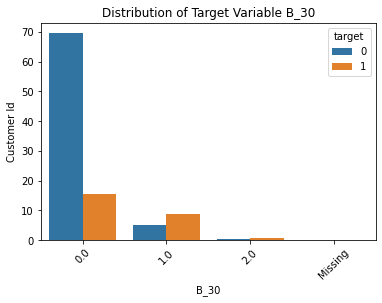

In [ ]:
print_stat(cat_df, 'B_30')
plot_cat(cat_df, 'B_30')
del cat_df

Number of unique categories for B_38 is 7
Number of unique categories for B_38 is [ 2.  1.  3.  5.  6.  7.  4. nan]
Number of entries with NaN value for B_38 is 2016


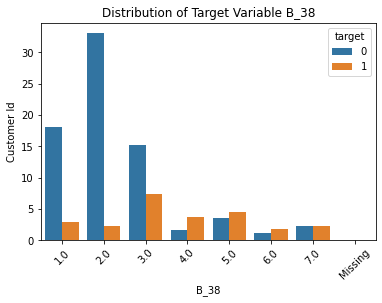

In [ ]:
cat_df = read_cols(['customer_ID', 'S_2', 'B_38'])
print_stat(cat_df, 'B_38')
plot_cat(cat_df, 'B_38')


Number of unique categories for D_114 is 2
Number of unique categories for D_114 is [ 1.  0. nan]
Number of entries with NaN value for D_114 is 176716


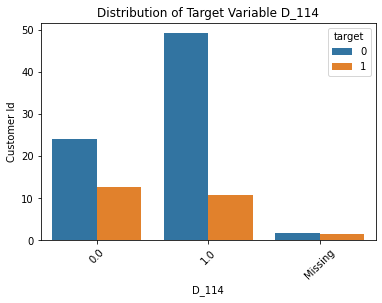

In [ ]:
cat_df = read_cols(['customer_ID', 'S_2', 'D_114'])
print_stat(cat_df, 'D_114')
plot_cat(cat_df, 'D_114')

Number of unique categories for D_116 is 2
Number of unique categories for D_116 is [ 0. nan  1.]
Number of entries with NaN value for D_116 is 176716


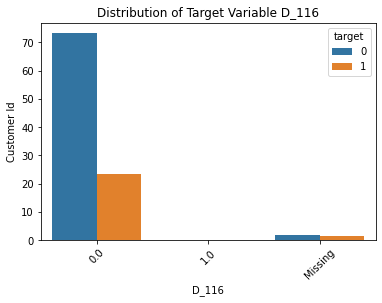

In [ ]:
cat_df = read_cols(['customer_ID', 'S_2', 'D_116'])
print_stat(cat_df, 'D_116')
plot_cat(cat_df, 'D_116')

The column does not have much data for category 1. Need to check this.

Number of unique categories for D_117 is 7
Number of unique categories for D_117 is [ 4. -1.  6.  2.  1. nan  3.  5.]
Number of entries with NaN value for D_117 is 176716


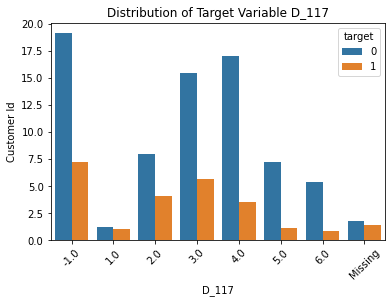

In [ ]:
cat_df = read_cols(['customer_ID', 'S_2', 'D_117'])
print_stat(cat_df, 'D_117')
plot_cat(cat_df, 'D_117')

Number of unique categories for D_120 is 2
Number of unique categories for D_120 is [ 0.  1. nan]
Number of entries with NaN value for D_120 is 176716


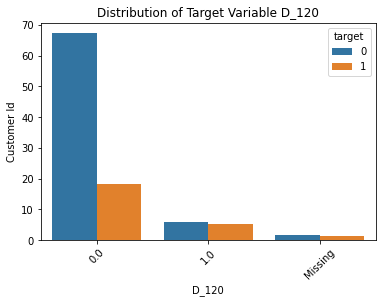

In [ ]:
cat_df = read_cols(['customer_ID', 'S_2', 'D_120'])
print_stat(cat_df, 'D_120')
plot_cat(cat_df, 'D_120')

Number of unique categories for D_126 is 3
Number of unique categories for D_126 is [ 1. nan  0. -1.]
Number of entries with NaN value for D_126 is 116816


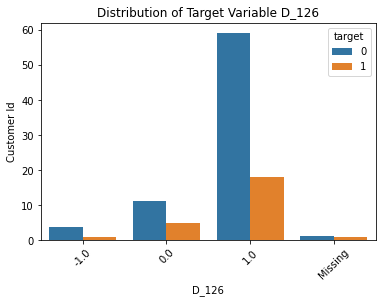

In [ ]:
cat_df = read_cols(['customer_ID', 'S_2', 'D_126'])
print_stat(cat_df, 'D_126')
plot_cat(cat_df, 'D_126')

Number of unique categories for D_66 is 2
Number of unique categories for D_66 is [nan  1.  0.]
Number of entries with NaN value for D_66 is 4908097


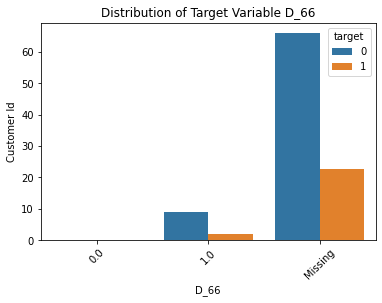

In [ ]:
cat_df = read_cols(['customer_ID', 'S_2', 'D_66'])
print_stat(cat_df, 'D_66')
plot_cat(cat_df, 'D_66')

Too much NaN values in column D_66, this column can be dropped.

Number of unique categories for D_68 is 7
Number of unique categories for D_68 is [ 6.  2.  3. nan  5.  4.  0.  1.]
Number of entries with NaN value for D_68 is 216503


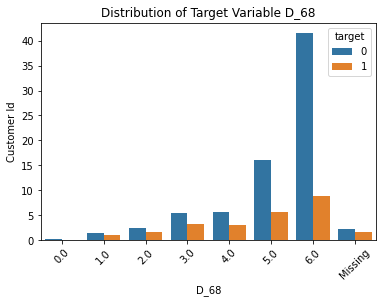

In [ ]:
cat_df = read_cols(['customer_ID', 'S_2', 'D_68'])
print_stat(cat_df, 'D_68')
plot_cat(cat_df, 'D_68')

## Explore Numerical Columns

In [27]:
def print_num_stat(df, col):
  print(f'{col} has {df[col].isnull().sum()} null values')
  print(num_df[col].describe().map('{:f}'.format))

def plot_dist(df, col):
  sns.displot(data=df, x=col, hue='target')
  plt.title('Distribution of Variable ' + col)
  

In [ ]:
num_df = read_cols(['customer_ID', 'S_2', 'P_2'])

P_2 has 45985 null values
count    5485466.000000
mean           0.656334
std            0.244649
min           -0.458955
25%            0.480331
50%            0.694295
75%            0.864816
max            1.010000
Name: P_2, dtype: object


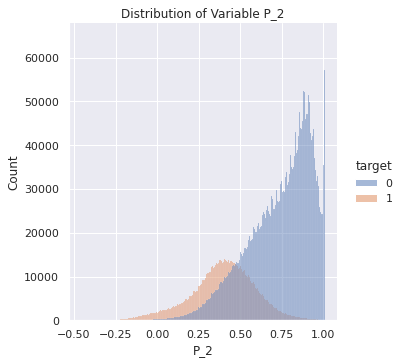

In [ ]:
print_num_stat(num_df, 'P_2')
plot_dist(num_df, 'P_2')

### Explore D_* Numerical Columns

In [15]:
numerical_features = columns[columns==np.number].filter(regex='D_*', axis=0).index.tolist()
print(f'There are {len(numerical_features)} numerical features in D_* ' )

There are 94 numerical features in D_* 


### Explore P_* Numerical Columns

In [20]:
numerical_features = columns[columns==np.number].filter(regex='P_*', axis=0).index.tolist()
print(f'There are {len(numerical_features)} numerical features in P_* ' )

There are 3 numerical features in P_* 


fetching P_2 
plotting P_2
P_2 has 45985 null values
count    5485466.000000
mean           0.656334
std            0.244649
min           -0.458955
25%            0.480331
50%            0.694295
75%            0.864816
max            1.010000
Name: P_2, dtype: object
fetching P_3 
plotting P_3
P_3 has 301492 null values
count    5229959.000000
mean           0.601289
std            0.170799
min           -1.519690
25%            0.540866
50%            0.618303
75%            0.683826
max            2.428051
Name: P_3, dtype: object
fetching P_4 
plotting P_4
P_4 has 0 null values
count    5531451.000000
mean           0.143927
std            0.338272
min            0.000000
25%            0.002924
50%            0.005849
75%            0.008766
max            1.269390
Name: P_4, dtype: object


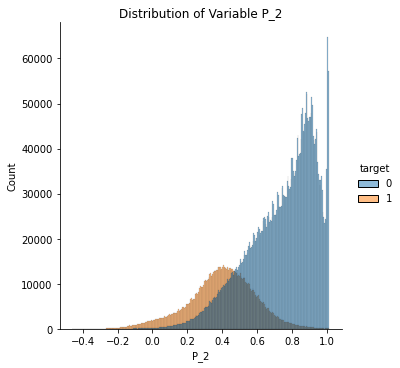

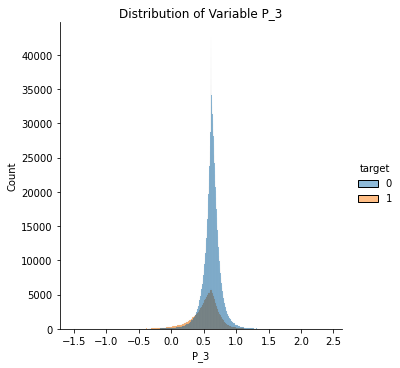

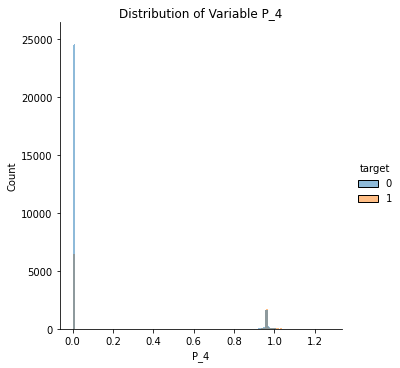

In [29]:
for col in numerical_features:
  print(f'fetching {col} ')
  num_df = read_cols(['customer_ID', 'S_2', col])
  print(f'plotting {col}')
  print_num_stat(num_df, col)
  plot_dist(num_df, col)

### Explore S_* Numerical Columns

In [ ]:
numerical_features = columns[columns==np.number].filter(regex='S_*', axis=0).index.tolist()
print(f'There are {len(numerical_features)} numerical features in S_* ' )
for col in numerical_features:
  print(f'fetching {col} ')
  num_df = read_cols(['customer_ID', 'S_2', col])
  print(f'plotting {col}')
  print_num_stat(num_df, col)
  plot_dist(num_df, col)

There are 21 numerical features in S_* 
fetching S_3 
plotting S_3
S_3 has 1020544 null values
count    4510907.000000
mean           0.225845
std            0.193347
min           -0.627132
25%            0.127259
50%            0.163908
75%            0.258102
max            5.482888
Name: S_3, dtype: object
fetching S_5 
plotting S_5
S_5 has 0 null values
count    5531451.000000
mean           0.088105
std            0.407405
min            0.000000
25%            0.005636
50%            0.013521
75%            0.071321
max          206.875280
Name: S_5, dtype: object
fetching S_6 
plotting S_6
S_6 has 0 null values
count    5531451.000000
mean           0.244192
std            0.426600
min            0.000000
25%            0.003285
50%            0.006573
75%            0.009859
max            1.010000
Name: S_6, dtype: object
fetching S_7 
plotting S_7
S_7 has 1020544 null values
count    4510907.000000
mean           0.223138
std            0.206303
min           -0.470132
25%  

### Explore B_* Numerical Columns

In [18]:
numerical_features = columns[columns==np.number].filter(regex='B_*', axis=0).index.tolist()
print(f'There are {len(numerical_features)} numerical features in B_* ' )

There are 39 numerical features in B_* 


### Explore R_* Numerical Columns

In [19]:
numerical_features = columns[columns==np.number].filter(regex='R_*', axis=0).index.tolist()
print(f'There are {len(numerical_features)} numerical features in R_* ' )

There are 28 numerical features in R_* 
